IMPORTING THE DEPENDENCIES


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
df = pd.read_csv("./fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [18]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>],
       [<Axes: title={'center': 'zip'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >]], dtype=object)

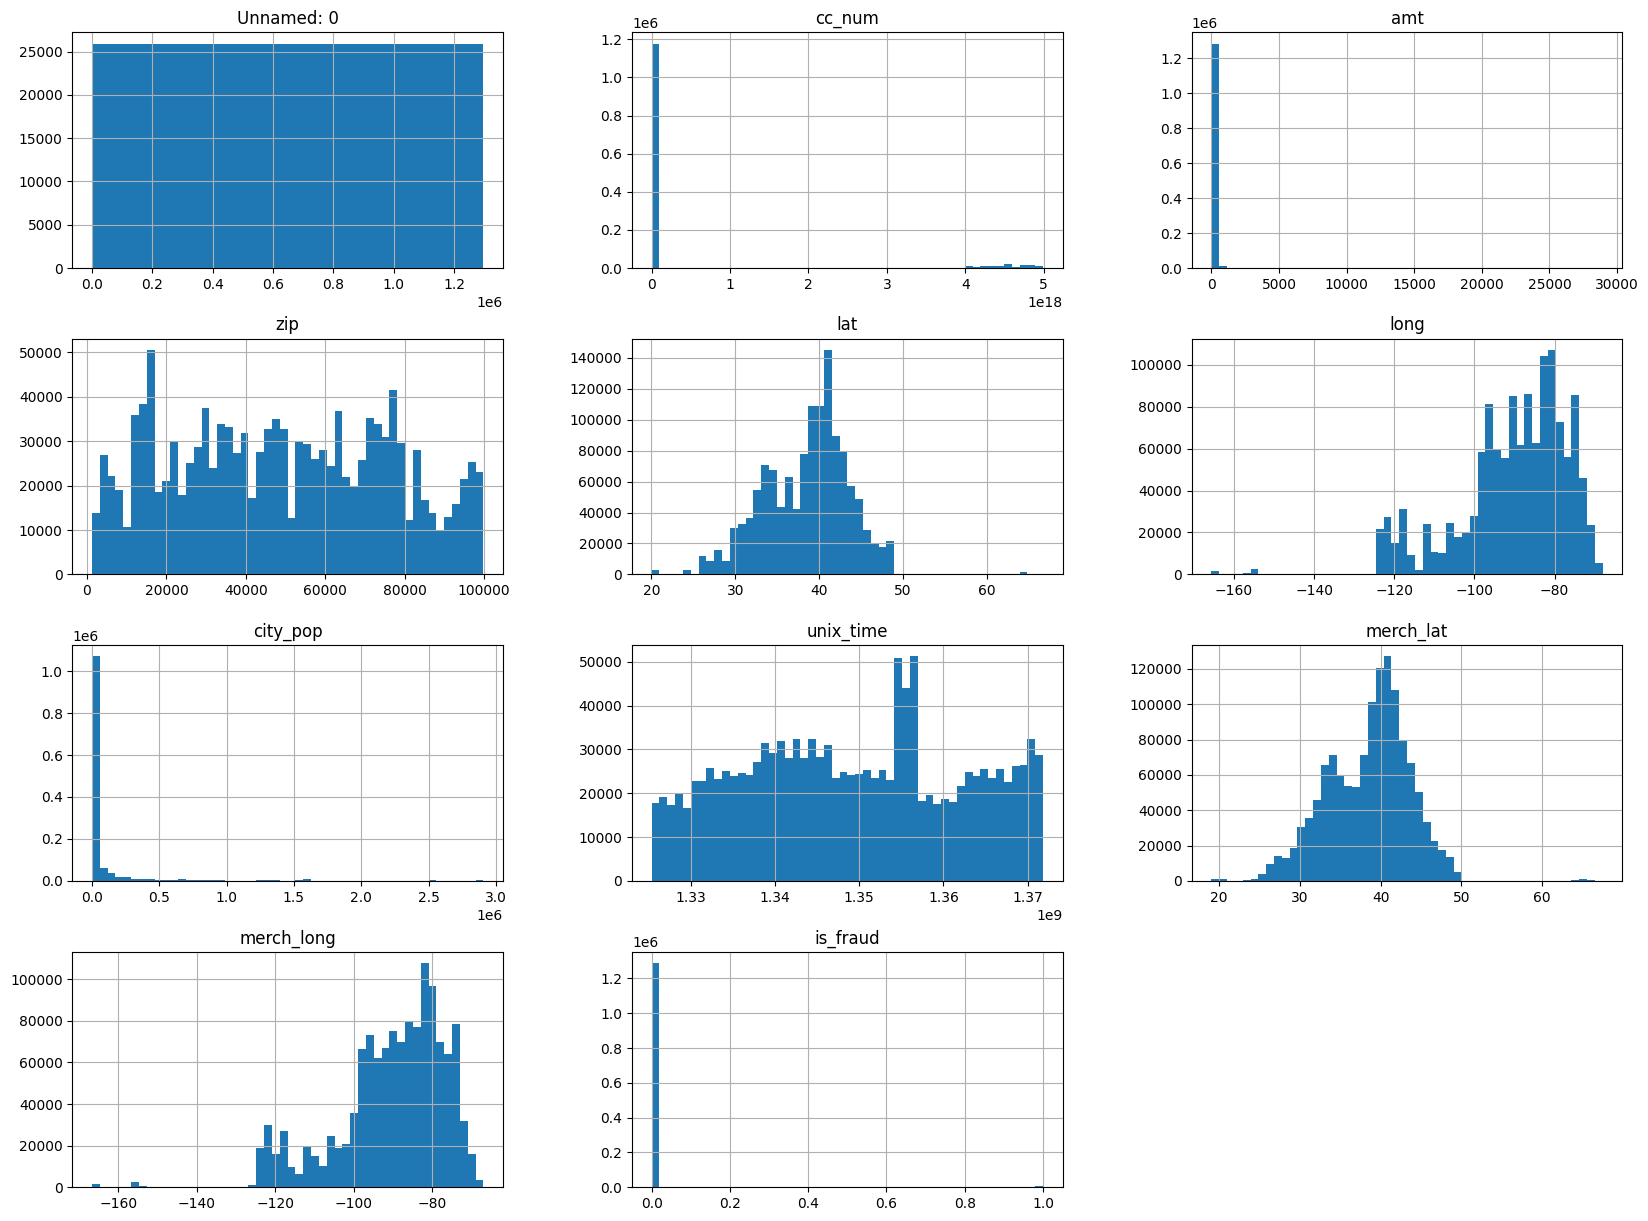

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))

In [20]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [21]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test size:{len(test_set)}\n")

Rows in train set:1037340
Rows in test size:259335



In [22]:
corr_matrix=df.corr()

<ipython-input-22-a4bfebfd3231>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


In [23]:
corr_matrix['amt'].sort_values(ascending =False)

amt           1.000000
is_fraud      0.219404
city_pop      0.005818
zip           0.001843
cc_num        0.001769
merch_long   -0.000151
long         -0.000187
Unnamed: 0   -0.000251
unix_time    -0.000293
merch_lat    -0.001873
lat          -0.001926
Name: amt, dtype: float64

array([[<Axes: xlabel='amt', ylabel='amt'>,
        <Axes: xlabel='cc_num', ylabel='amt'>,
        <Axes: xlabel='lat', ylabel='amt'>,
        <Axes: xlabel='long', ylabel='amt'>],
       [<Axes: xlabel='amt', ylabel='cc_num'>,
        <Axes: xlabel='cc_num', ylabel='cc_num'>,
        <Axes: xlabel='lat', ylabel='cc_num'>,
        <Axes: xlabel='long', ylabel='cc_num'>],
       [<Axes: xlabel='amt', ylabel='lat'>,
        <Axes: xlabel='cc_num', ylabel='lat'>,
        <Axes: xlabel='lat', ylabel='lat'>,
        <Axes: xlabel='long', ylabel='lat'>],
       [<Axes: xlabel='amt', ylabel='long'>,
        <Axes: xlabel='cc_num', ylabel='long'>,
        <Axes: xlabel='lat', ylabel='long'>,
        <Axes: xlabel='long', ylabel='long'>]], dtype=object)

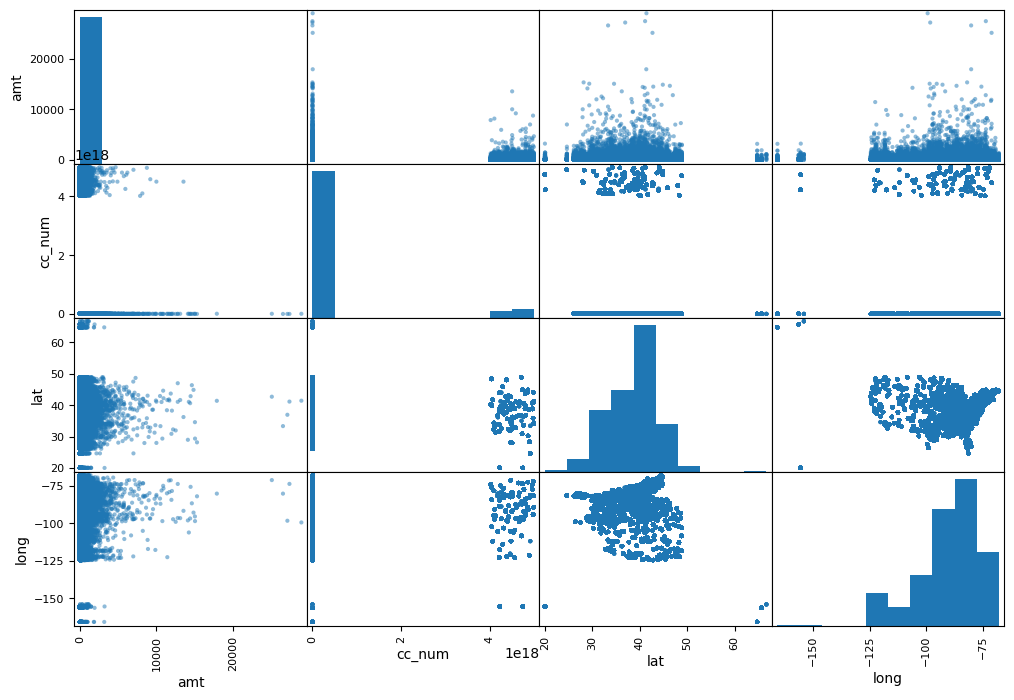

In [24]:
from pandas.plotting import scatter_matrix
attributes=["amt","cc_num","lat","long"]
scatter_matrix(df[attributes],figsize=(12,8))

<Axes: xlabel='amt', ylabel='cc_num'>

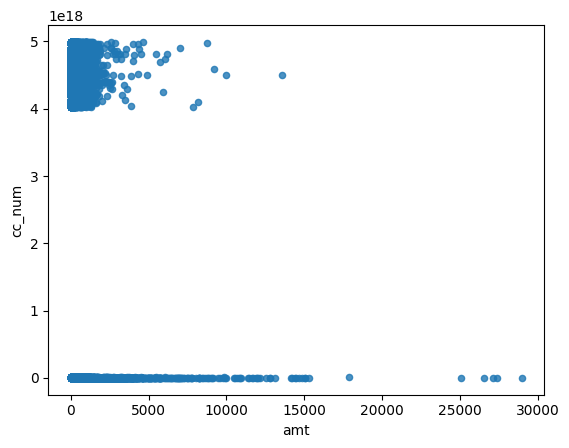

In [25]:
df.plot(kind="scatter",x="amt",y="cc_num",alpha=0.8)

In [27]:
df["cc_numamt"]=df["cc_num"]/df["amt"]

In [26]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [28]:
corr_matrix=df.corr()
corr_matrix['lat'].sort_values(ascending=False)

<ipython-input-28-41db62c644a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


lat           1.000000
merch_lat     0.993592
is_fraud      0.001894
unix_time     0.000632
Unnamed: 0    0.000602
amt          -0.001926
merch_long   -0.015509
long         -0.015533
cc_numamt    -0.036804
cc_num       -0.059271
zip          -0.114290
city_pop     -0.155730
Name: lat, dtype: float64

In [29]:
df['amt'].value_counts()

1.14       542
1.04       538
1.25       535
1.02       533
1.01       523
          ... 
334.21       1
674.31       1
358.59       1
1159.68      1
255.52       1
Name: amt, Length: 52928, dtype: int64

In [30]:
legit = df[df.amt== 0]
fraud = df[df.amt == 1]

In [31]:
print(legit.shape)
print(fraud.shape)

(0, 24)
(222, 24)


<Axes: xlabel='cc_numamt', ylabel='lat'>

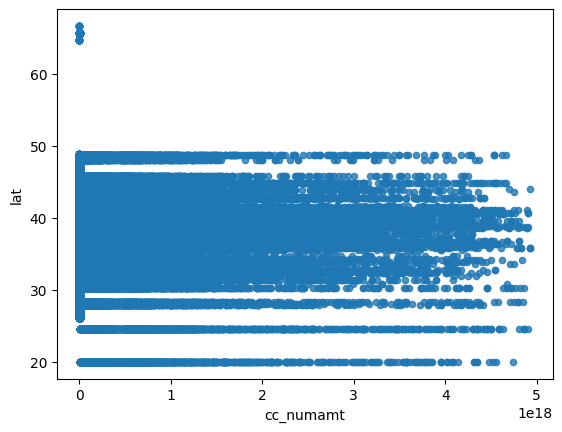

In [32]:
df.plot(kind="scatter",x="cc_numamt",y="lat",alpha=0.8)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("fraudTrain.csv",encoding='ISO-8859-1')

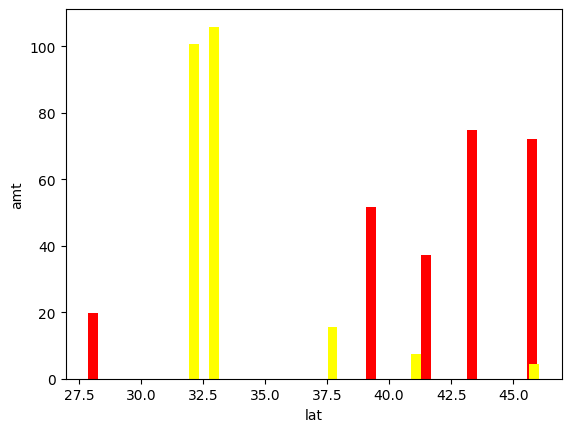

In [37]:
df= df.tail(10)
x=df["lat"]
y=df["amt"]
plt.bar(x,y, color=["red","yellow"],width=0.4)
plt.xlabel("lat")
plt.ylabel("amt")
plt.show()

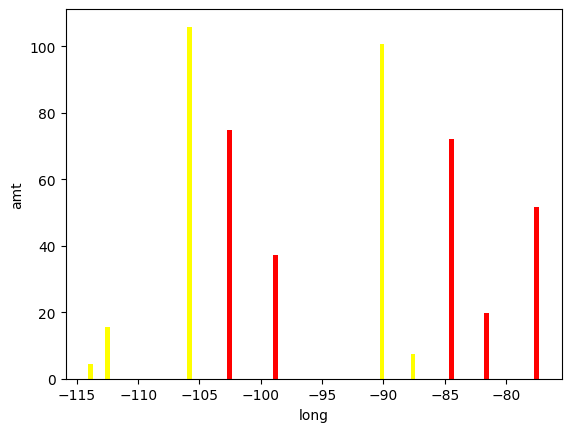

In [38]:
df= df.tail(10)
x=df["long"]
y=df["amt"]
plt.bar(x,y, color=["red","yellow"],width=0.4)
plt.xlabel("long")
plt.ylabel("amt")
plt.show()

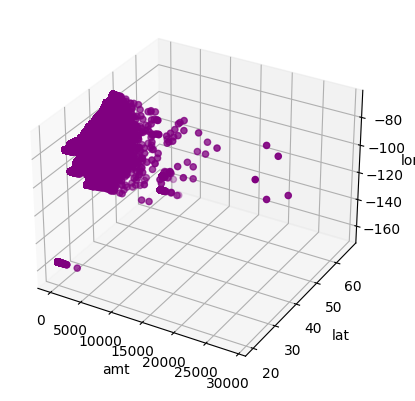

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df=pd.read_csv("fraudTrain.csv")
x=df["amt"]
y=df["lat"]
z=df["long"]
f=plt.figure()
a=f.add_subplot(111, projection="3d")
a.scatter(x,y,z, color="purple")
a.set_xlabel("amt")
a.set_ylabel("lat")
a.set_zlabel("long")
plt.show()

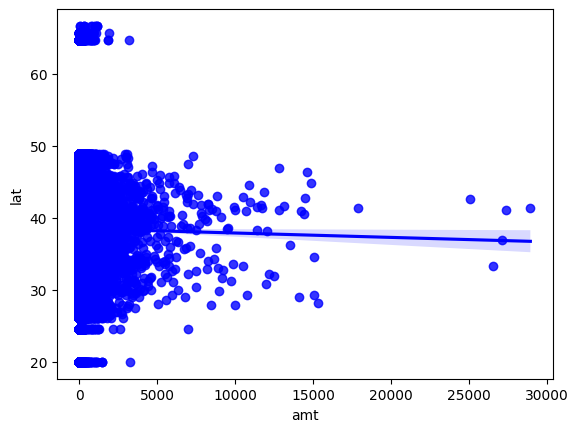

In [43]:
import pandas as pd
import seaborn as sns
housing=pd.read_csv("fraudTrain.csv")
x=("amt")
y=("lat")
x_data=housing[x]
y_data=housing[y]
sns.regplot(x=x_data, y=y_data, color="blue")
plt.title("")
plt.xlabel("amt")
plt.ylabel("lat")
plt.show()

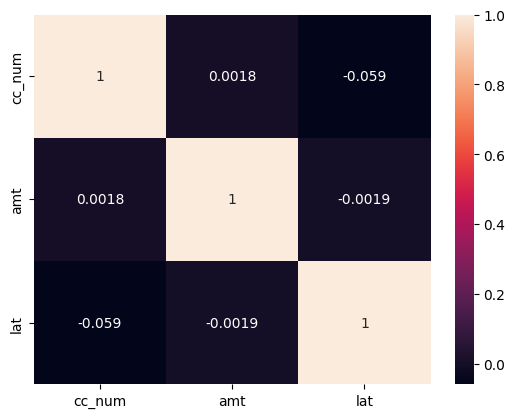

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("fraudTrain.csv")
cols=["cc_num","amt","lat"]
corr_matrix=df[cols].corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [46]:
from sklearn.neighbors import LocalOutlierFactor

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
legit.amt.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: amt, dtype: float64

In [50]:
fraud.amt.describe()

count    222.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: amt, dtype: float64

In [51]:
df.groupby('amt').mean()

<ipython-input-51-0904dab08123>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('amt').mean()


,Unnamed: 0,cc_num,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
amt,,,,,,,,,,
1.00,6.405020e+05,3.727207e+17,50675.810811,37.801973,-91.394928,96090.238739,1.348936e+09,37.770291,-91.362788,0.0
1.01,6.385088e+05,4.726988e+17,47799.323136,38.596222,-89.660464,74451.007648,1.348938e+09,38.606640,-89.664857,0.0
1.02,6.498264e+05,4.173773e+17,48435.617261,38.453264,-90.262289,101762.153846,1.349303e+09,38.448784,-90.293494,0.0
1.03,6.329993e+05,3.437566e+17,50853.126253,38.299988,-91.147122,65435.234469,1.348765e+09,38.297547,-91.122632,0.0
1.04,6.152420e+05,3.705127e+17,49702.334572,38.603704,-90.765559,89881.169145,1.348100e+09,38.580517,-90.758509,0.0
...,...,...,...,...,...,...,...,...,...,...
25086.94,3.528940e+05,5.540637e+15,1843.000000,42.691100,-71.160500,76383.000000,1.339705e+09,42.397174,-71.474163,0.0
26544.12,6.062110e+05,3.040830e+13,29436.000000,33.336400,-80.185900,4471.000000,1.347661e+09,33.020256,-80.125607,0.0
27119.77,1.234797e+06,6.042310e+10,73719.000000,36.941200,-98.245800,83.000000,1.369935e+09,37.286865,-97.249611,0.0


In [52]:
new_dataset = pd.concat([legit, fraud], axis=0)

In [53]:
new_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,cc_numamt
21768,21768,2019-01-14 00:57:30,3552581383553463,"fraud_Schuppe, Nolan and Hoeger",shopping_pos,1.0,Jonathan,Castro,M,200 Christie Mills Apt. 307,...,-83.8228,5354,Retail buyer,1965-04-13,197ae55bfdf14775bb51bc0e9e70eeeb,1326502650,35.600491,-84.324442,0,3.552581e+15
22762,22762,2019-01-14 13:05:13,4561368699336875,fraud_Turner and Sons,shopping_pos,1.0,Pamela,Lewis,F,653 Jessica Extension Apt. 668,...,-81.8327,167,Museum/gallery conservator,1988-11-01,9f54e7b342064745407f9a3012e814d6,1326546313,35.134181,-82.804672,0,4.561369e+15
23685,23685,2019-01-14 20:23:49,2712209726293386,"fraud_McLaughlin, Armstrong and Koepp",travel,1.0,Jenna,Brooks,F,50872 Alex Plain Suite 088,...,-91.1468,378909,"Designer, furniture",1977-02-22,cb8bf5e2473d7fcb0c457f9bba6a4bfc,1326572629,30.007442,-91.080276,0,2.712210e+15
25146,25146,2019-01-15 13:05:16,4045036286570100739,fraud_Dare-Gibson,health_fitness,1.0,Bianca,Scott,F,9588 Cox Rapid Apt. 257,...,-75.9703,3066,Product manager,1928-07-15,3d7f67a607ea5d48511941f41025190d,1326632716,39.102257,-76.958004,0,4.045036e+18
34740,34740,2019-01-21 13:23:59,340951438290556,fraud_Dooley Inc,shopping_pos,1.0,Maria,Garcia,F,865 Thomas Village,...,-73.9609,5950,Records manager,1971-07-02,c67f870d1ae29b034b7731d191bb9a89,1327152239,41.729484,-74.904069,0,3.409514e+14


In [54]:
new_dataset.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,cc_numamt
1257862,1257862,2020-06-07 18:21:00,4906628655840914250,"fraud_Gottlieb, Considine and Schultz",shopping_net,1.0,Charles,Moreno,M,838 Franklin Prairie Apt. 902,...,-81.3824,32891,Town planner,1987-02-13,3ca47402518dec29506041777158bfdd,1370629260,25.629121,-81.597758,0,4.906629e+18
1277704,1277704,2020-06-14 18:08:57,4810789809665942990,fraud_Beier-Hyatt,shopping_pos,1.0,Julie,Sanchez,F,916 Charles Road,...,-83.7153,338,Quantity surveyor,1988-07-28,336bb596d94d21dbf4a0f20aac803a21,1371233337,38.821318,-83.389821,0,4.810790e+18
1280050,1280050,2020-06-15 09:49:35,3551512895305309,"fraud_Towne, Greenholt and Koepp",shopping_net,1.0,Erika,Anderson,F,3786 Hale Corners,...,-86.8592,443,"Development worker, international aid",1947-07-15,0c720cba411853b4745b8710257c5ba7,1371289775,37.914319,-87.350200,0,3.551513e+15
1285738,1285738,2020-06-16 18:47:49,341283058448499,fraud_Fadel-Hilpert,health_fitness,1.0,Mario,Johns,M,62130 Miller Square Suite 785,...,-84.7373,1461,"Engineer, broadcasting (operations)",1935-09-08,87b08fb4e68fc057ef9c34b1807b433e,1371408469,30.328103,-85.606165,0,3.412831e+14
1292645,1292645,2020-06-19 21:36:16,4764202053279782,"fraud_Reichert, Shanahan and Hayes",shopping_net,1.0,Derek,Jones,M,198 Candace Plaza,...,-81.0425,2644,Air cabin crew,1981-01-06,c66f68837198b1658677caa9141aa8e9,1371677776,41.579512,-80.244945,0,4.764202e+15


In [55]:
new_dataset['long'].value_counts()

-96.6012     3
-106.0609    3
-83.8228     2
-98.5551     2
-74.4150     2
            ..
-83.4845     1
-78.4074     1
-88.4092     1
-93.2977     1
-81.0425     1
Name: long, Length: 190, dtype: int64

In [56]:
X = new_dataset.drop(columns='long', axis=1)
Y = new_dataset['long']

In [57]:
print(X)

         Unnamed: 0 trans_date_trans_time               cc_num  \
21768         21768   2019-01-14 00:57:30     3552581383553463   
22762         22762   2019-01-14 13:05:13     4561368699336875   
23685         23685   2019-01-14 20:23:49     2712209726293386   
25146         25146   2019-01-15 13:05:16  4045036286570100739   
34740         34740   2019-01-21 13:23:59      340951438290556   
...             ...                   ...                  ...   
1257862     1257862   2020-06-07 18:21:00  4906628655840914250   
1277704     1277704   2020-06-14 18:08:57  4810789809665942990   
1280050     1280050   2020-06-15 09:49:35     3551512895305309   
1285738     1285738   2020-06-16 18:47:49      341283058448499   
1292645     1292645   2020-06-19 21:36:16     4764202053279782   

                                      merchant        category  amt     first  \
21768          fraud_Schuppe, Nolan and Hoeger    shopping_pos  1.0  Jonathan   
22762                    fraud_Turner and Son

In [58]:
print(Y)


21768     -83.8228
22762     -81.8327
23685     -91.1468
25146     -75.9703
34740     -73.9609
            ...   
1257862   -81.3824
1277704   -83.7153
1280050   -86.8592
1285738   -84.7373
1292645   -81.0425
Name: long, Length: 222, dtype: float64


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(222, 23) (177, 23) (45, 23)


In [61]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [62]:
fraud = df[df['is_fraud']==1]

normal = df[df['is_fraud']==0]

In [63]:
print(fraud.shape,normal.shape)

(7506, 23) (1289169, 23)


In [64]:
fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [65]:
normal.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [66]:
df_sample= df.sample(frac = 0.1,random_state=1)

df_sample.shape

(129668, 23)

In [67]:
df.shape

(1296675, 23)

In [68]:
Fraud = df_sample[df_sample['is_fraud']==1]

Valid = df_sample[df_sample['is_fraud']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [69]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.005466684242767306
Fraud Cases : 705
Valid Cases : 128963


In [70]:
#Create independent and Dependent Features
columns = df_sample.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["is_fraud"]]
# Store the variable we are predicting
target = "is_fraud"
# Define a random state
state = np.random.RandomState(42)
X = df_sample[columns]
Y = df_sample[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(129668, 22)
(129668,)


In [71]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
}

type(classifiers)

dict

In [72]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in X.columns:
    if X[column_name].dtype == object:
        X[column_name] = le.fit_transform(X[column_name])
    else:
        pass

<ipython-input-72-df4e8b2b4e31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name] = le.fit_transform(X[column_name])
<ipython-input-72-df4e8b2b4e31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name] = le.fit_transform(X[column_name])
<ipython-input-72-df4e8b2b4e31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [73]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 1358
Accuracy Score :
0.9895270999784064
Local Outlier Factor: 1311
Accuracy Score :
0.9898895641175927


Observations :

Isolation Forest has a 98.87% which is more accurate than LOF of 98.81%.

When comparing error precision & recall for 2 models , the Isolation Forest performed much better than the LOF.